In [2]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df=pd.read_csv("data/stud.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.shape

(1000, 8)

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
print(df["gender"].unique())
print(df["race/ethnicity"].unique())
print(df["parental level of education"].unique())
print(df["lunch"].unique())
print(df["test preparation course"].unique())
print(df["math score"].unique())
print(df["reading score"].unique())
print(df["writing score"].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  

In [11]:
numerical_features=[features for features in df.columns if df[features].dtype!="O"]
categorical_features=[features for features in df.columns if df[features].dtype=="O"]
numerical_features
# categorical_features


['math score', 'reading score', 'writing score']

In [13]:
df.head()
df["Total Score"]=df["math score"]+df["reading score"]+df["writing score"]
df["Average Score"]=(df["Total Score"])/3

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full=df[df["reading score"]==100]["Average Score"].count()
writing_full=df[df["writing score"]==100]["Average Score"].count()
math_full=df[df["math score"]==100]["Average Score"].count()

print(reading_full)
print(writing_full)
print(math_full)

17
14
7


In [16]:
reading_less_20=df[df["reading score"] <= 20]["Average Score"].count()
writing_less_20=df[df["writing score"] <= 20]["Average Score"].count()
math_less_20=df[df["math score"] <= 20]["Average Score"].count()

print(reading_less_20)
print(writing_less_20)
print(math_less_20)

1
3
4


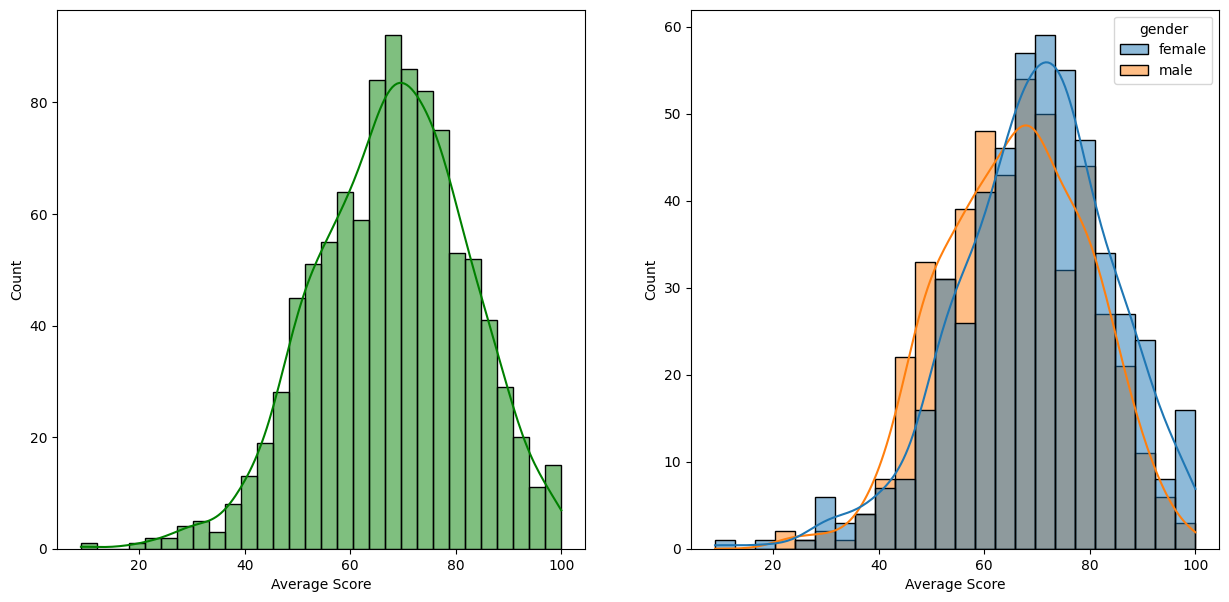

In [17]:
fig, axis =plt.subplots(1,2 , figsize=(15,7))
plt.subplot(121)
sea.histplot(data=df,x="Average Score",bins=30,kde=True,color='g')
plt.subplot(122)
sea.histplot(data=df,x="Average Score",kde=True,hue="gender")
plt.show()

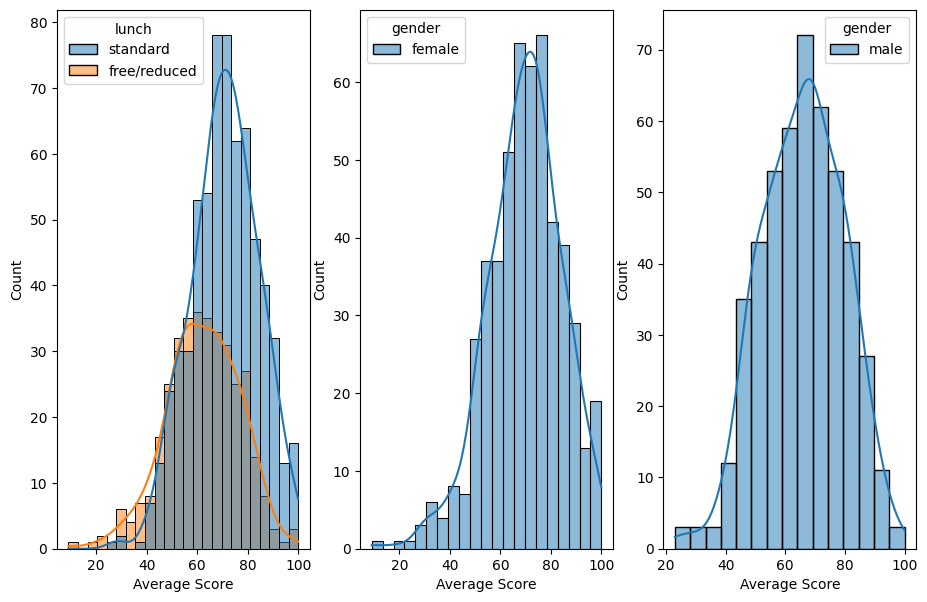

In [31]:
fig, axis =plt.subplots(1,3, figsize=(15,7))
plt.subplot(141)
sea.histplot(data=df,x="Average Score",kde=True,hue="lunch")
plt.subplot(142)
sea.histplot(data=df[df["gender"]=="female"],x="Average Score",kde=True,hue="gender")
plt.subplot(143)
sea.histplot(data=df[df["gender"]=="male"],x="Average Score",kde=True,hue="gender")
plt.show()